# <CENTER> ADABOOST

<center>  <img src="https://i.imgur.com/l7VIdCY.png" width="200"> <center> 




#### BANK MARKETING:
Para este proyecto se empleo la data de UCI: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <p>

Se evaluará un dataset compuesto por datos de campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si un cliente se va a suscribir a un depósito a plazo fijo.

###### RESUMEN DATASET:
<b><u>Predictoras:</u></b> <p>

###### a) Datos del cliente:
| <center>Nombre |<center> Tipo | <center>Descripción |
|------|------|-------------|
|<P ALIGN="justify">   age  | numérico | <P ALIGN="justify">Edad del cliente |
|<P ALIGN="justify">   job  | categórico | <P ALIGN="justify"> Tipo de empleo: 'admin.','blue_collar','entrepreneur','housemaid','management',<br>'retired','self_employed','services','student','technician','unemployed','unknown' |
|<P ALIGN="justify">   marital  | categórico | <P ALIGN="justify">Estado civil:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed |
|<P ALIGN="justify">   education  | categórico | <P ALIGN="justify">Nivel de educación: primary, secondary, tertiary and unknown |
| <P ALIGN="justify">  default  | categórico | <P ALIGN="justify">Tiene crédito por "default"? (no, yes, unknown) |
|<P ALIGN="justify">   housing  | categórico | <P ALIGN="justify">Tiene prestamo de vivienda? (no, yes, unknown)|
|<P ALIGN="justify">   loan  | categórico | <P ALIGN="justify">Tiene prestamo personal? (no, yes, unknown)|
| <P ALIGN="justify">  balance  | numérico | <P ALIGN="justify">Balance anual promedio en euros |

<br>
<br>

###### b) Datos relacionados con el último contacto de la campaña actual:

| <center>Nombre |<center> Tipo | <center>Descripción |
|------|------|-------------|
|<P ALIGN="justify">   contact  | categórico | <P ALIGN="justify">Tipo de comunicación del contacto ('cellular','telephone') |
|<P ALIGN="justify">   month  | categórico | <P ALIGN="justify"> Último mes de contacto en el año ('jan', 'feb', 'mar', ..., 'nov', 'dec') |
|<P ALIGN="justify">   day  | categórico | <P ALIGN="justify">Último día de contacto de la semana ('mon','tue','wed','thu','fri') |
|<P ALIGN="justify">   duration  | numérico | <P ALIGN="justify">Duración del último contacto (en segundos) |

<br>
<br>

###### c) Otros atributos:

| <center>Nombre |<center> Tipo | <center>Descripción |
|------|------|-------------|
|<P ALIGN="justify">   campaign  | numérico | <P ALIGN="justify">Cantidad de contactos realizados durante esta campaña y para este cliente (incluye el último contacto) |
|<P ALIGN="justify">   pdays  | numérico| <P ALIGN="justify"> Cantidad de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (-1 significa que el cliente no fue contactado previamente) |
|<P ALIGN="justify">   previous | numérico | <P ALIGN="justify">Cantidad de contactos realizados antes de esta campaña y para este cliente (numérico) |
|<P ALIGN="justify">   poutcome  | categórico | <P ALIGN="justify">Resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito') |

<b><u>Target:</u></b> <p>
    
| <center>Nombre |<center> Tipo | <center>Descripción |
|------|------|-------------|
|<P ALIGN="justify">   y  | binario | <P ALIGN="justify">El cliente se ha suscrito a un depósito a plazo? ('yes','no') |

In [1]:
#import modules
import numpy as np
import pandas as pd # dataframes
import matplotlib.pyplot as plt # Graficos
import seaborn as sns # graficos
% matplotlib inline

In [2]:
#Para directorio local
file="bank.csv"

In [3]:
data=pd.read_csv(file,sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
#Verificar nulos y tipo de datos en dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [7]:
#Target: el empleado dejó o no la empresa (1 = Sí, 0 = No)
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

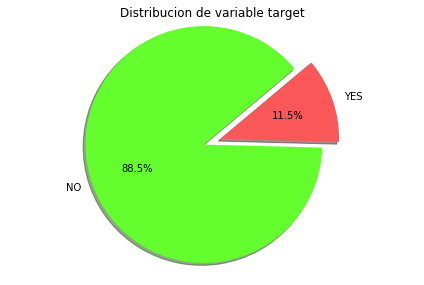

no     4000
yes     521
Name: y, dtype: int64


In [8]:
# Lista de colores
colors = ["#64FE2E", "#FA5858"]
labels="NO", "YES"
plt.suptitle('Distribucion de variable target')
# Create a pie chart
plt.pie(
    # using data total)arrests
    data['y'].value_counts(),
    # with the labels being officer names
    labels=labels, shadow=True,colors=colors,
    # with one slide exploded out
    explode=(0, 0.15), startangle=40,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.axis('equal')
# View the plot
plt.tight_layout()
plt.show()
print(data['y'].value_counts())

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
list(data)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [11]:

features_cat=['job','marital','education','default',
 'housing','loan','contact','day','month','poutcome']
features_num=['age','balance','duration','campaign','pdays','previous']


### Analisis univariado

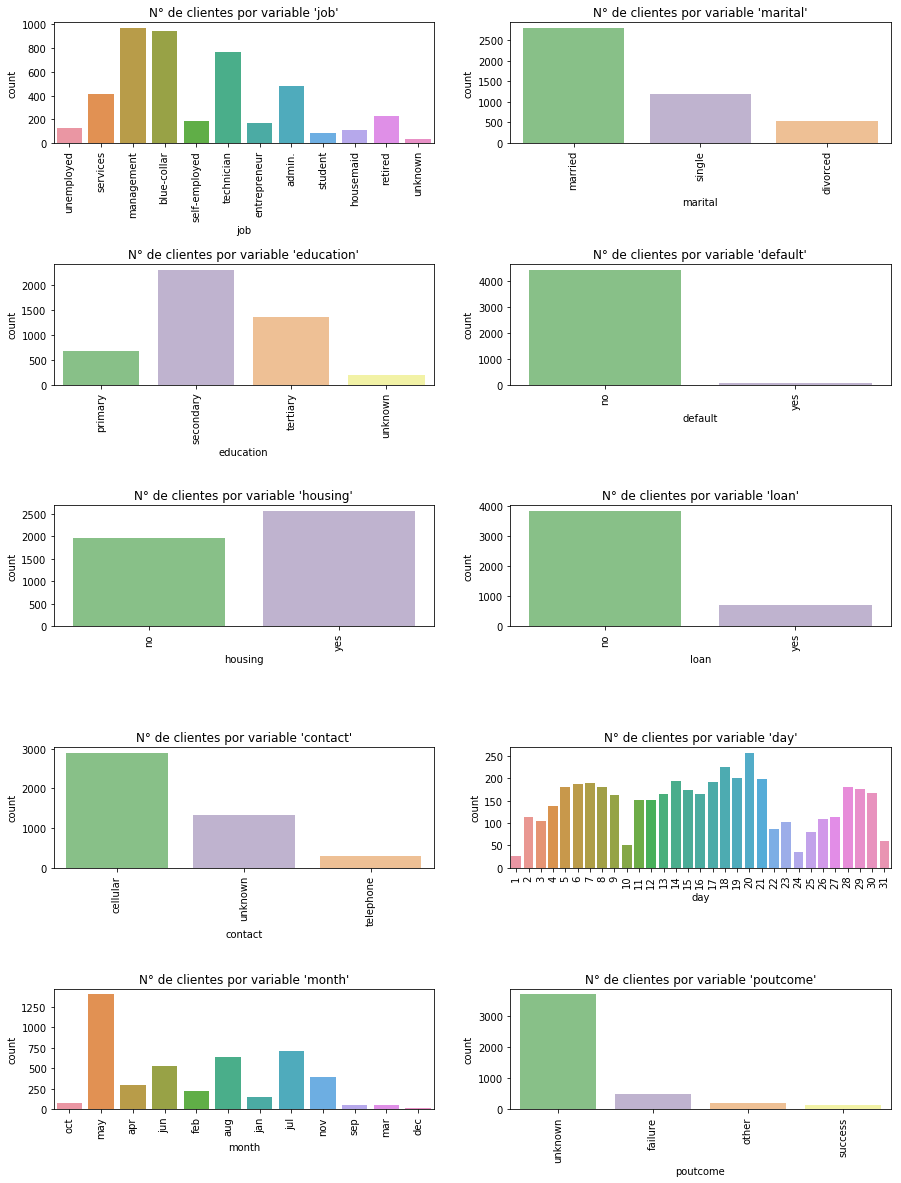

In [12]:
fig=plt.subplots(figsize=(15,20))
#enumerate: (0, ''number_project'), (1, 'time_spend_company'), etc
for i, j in enumerate(features_cat):
    plt.subplot(5, 2, i+1)#fila, columna, num
    plt.subplots_adjust(hspace = 1)#espacio entre plots
    sns.set_palette("Accent")
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)#ubicacion de labels(rotacion=90%)
    plt.title("N° de clientes por variable '"+j+"'")

### Analisis bivariado

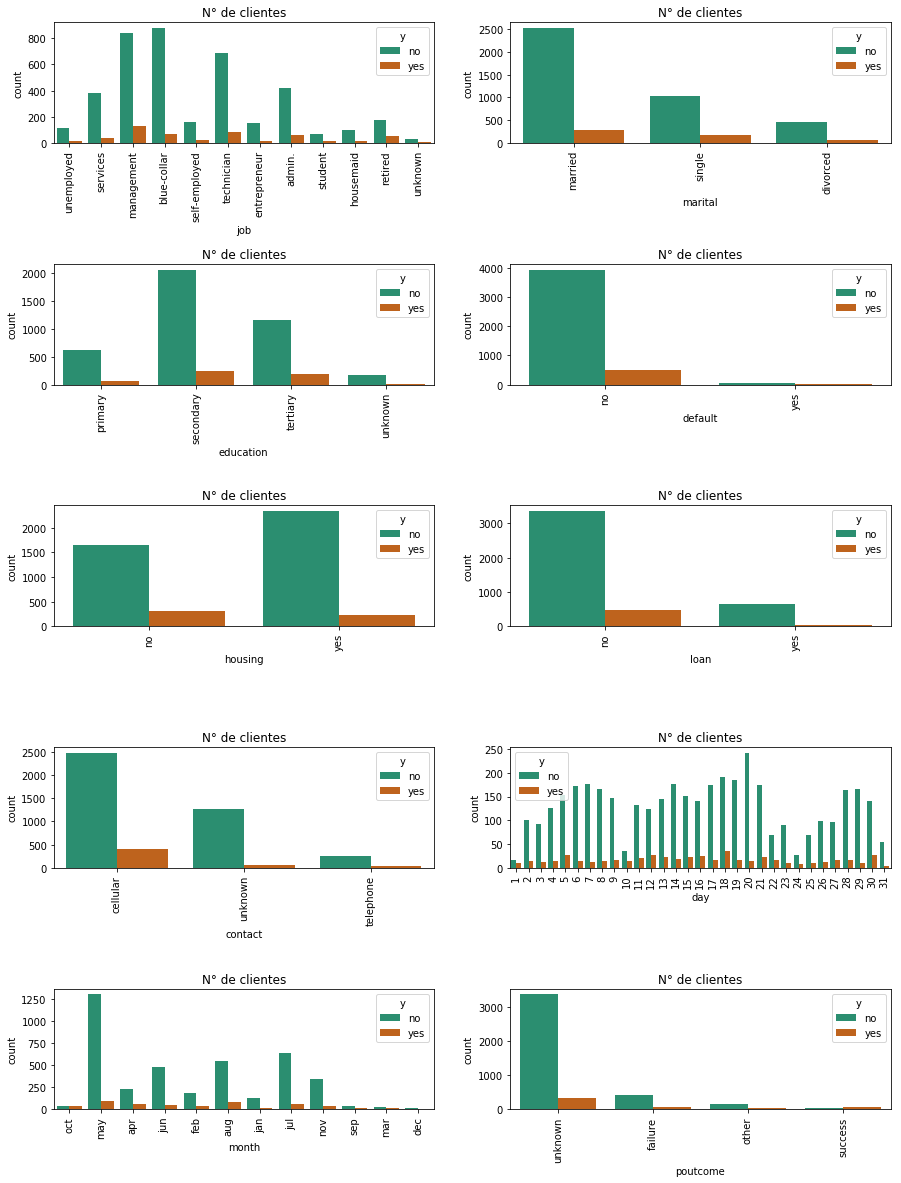

In [13]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features_cat):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.set_palette("Dark2")
    sns.countplot(x=j,data = data, hue='y')
    plt.xticks(rotation=90)
    plt.title("N° de clientes")

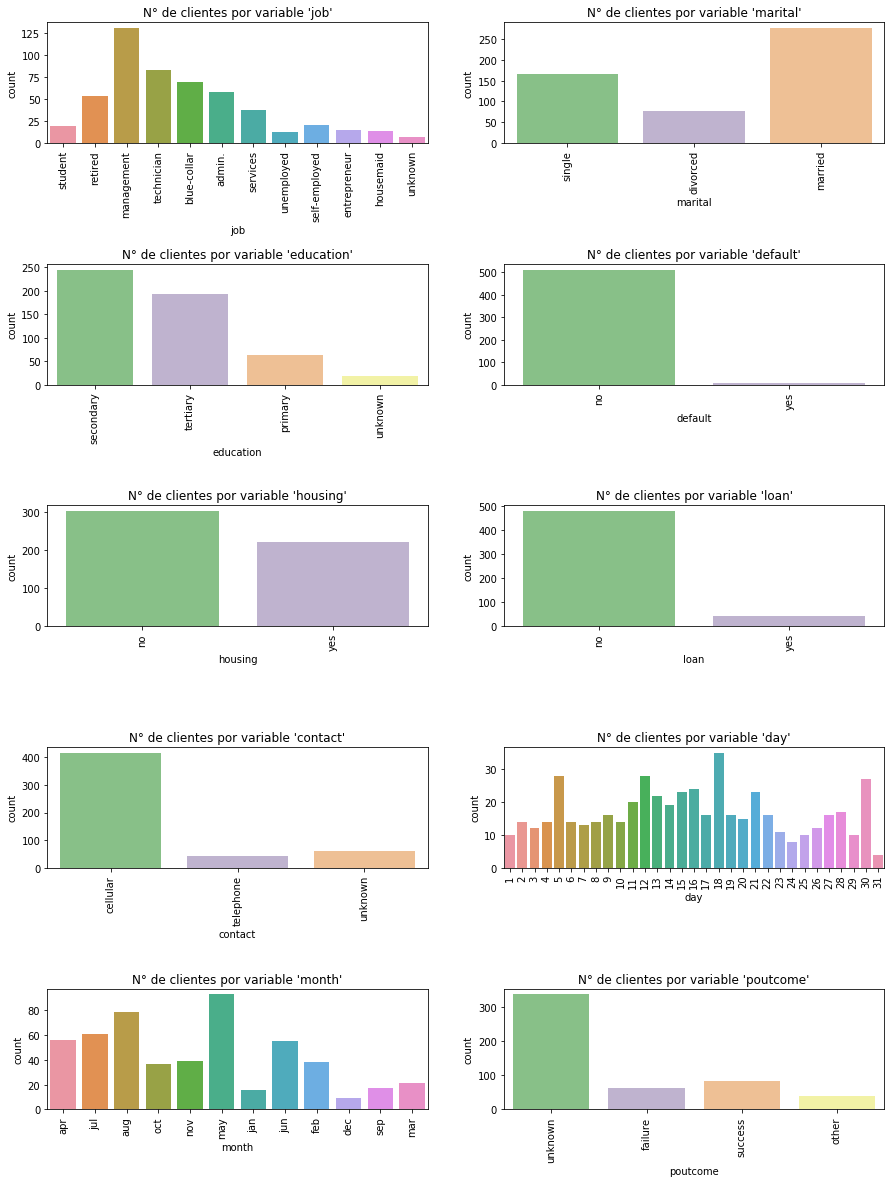

In [14]:
fig=plt.subplots(figsize=(15,20))
#enumerate: (0, ''number_project'), (1, 'time_spend_company'), etc
for i, j in enumerate(features_cat):
    plt.subplot(5, 2, i+1)#fila, columna, num
    plt.subplots_adjust(hspace = 1)#espacio entre plots
    sns.set_palette("Accent")
    sns.countplot(x=j,data = data[data['y']=='yes'])
    plt.xticks(rotation=90)#ubicacion de labels(rotacion=90%)
    plt.title("N° de clientes por variable '"+j+"'")


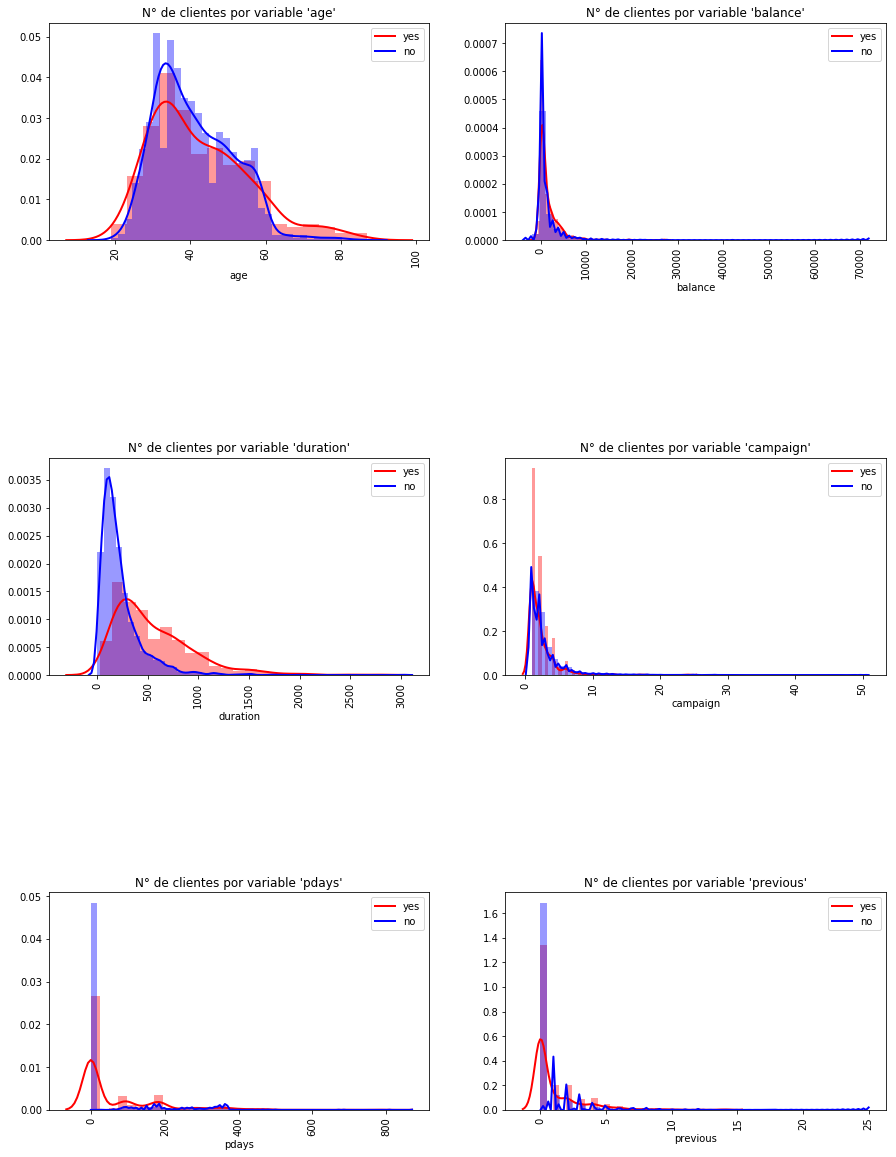

In [15]:
fig=plt.subplots(figsize=(15,20))
#enumerate: (0, ''number_project'), (1, 'time_spend_company'), etc
for i, j in enumerate(features_num):
    plt.subplot(3, 2, i+1)#fila, columna, num
    plt.subplots_adjust(hspace = 1)#espacio entre plots
    prog = 'sns.distplot(data[data["y"]=="yes"].'+j+'.dropna(),kde_kws={"color": "r", "lw": 2,"label": "yes"}, hist_kws={"color": "r"})'
    prog1 = 'sns.distplot(data[data["y"]=="no"].'+j+'.dropna(),kde_kws={"color": "b", "lw": 2,"label": "no"}, hist_kws={"color": "b"})'
    exec(prog) 
    exec(prog1) 
    plt.xticks(rotation=90)#ubicacion de labels(rotacion=90%)
    plt.title("N° de clientes por variable '"+j+"'")

In [16]:
# Hacer una copia para iniciar con los cambios
bank_data = data.copy()

In [17]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign


print("Clientes que no han sido contactados antes:", len(bank_data[bank_data.pdays==-1]))
print("Valor maximo de pdays    :", bank_data['pdays'].max())

Clientes que no han sido contactados antes: 3705
Valor maximo de pdays    : 871


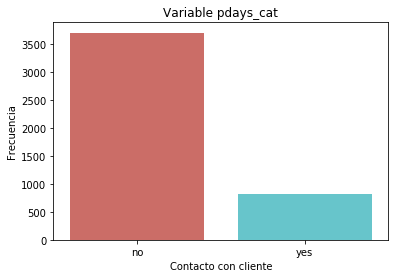

Clientes que NO han sido contactados antes: 3705
Clientes que SI han sido contactados antes: 816


In [18]:
#categorizar variable
#Dataframe.loc[condicion,columna_especifica]=setear un valor

#pdays-> ¿Se ha contactado previamente al cliente desde la ultima campaña?
#no= no contactado , yes = si se contacto previamente

bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 0
bank_data.loc[bank_data['pdays'] > 0, 'pdays'] = 'yes'
bank_data['pdays'] =bank_data['pdays'].replace([0] , 'no')

bank_data['pdays_cat'] =bank_data['pdays']
bank_data.drop('pdays', axis=1, inplace=True)

#plot
sns.countplot(x='pdays_cat',data=bank_data,palette='hls')
plt.title('Variable pdays_cat')
plt.xlabel('Contacto con cliente')
plt.ylabel('Frecuencia')
plt.show()

print("Clientes que NO han sido contactados antes:", len(bank_data[bank_data.pdays_cat=='no']))
print("Clientes que SI han sido contactados antes:", len(bank_data[bank_data.pdays_cat=='yes']))

Text(0.5,1,'Cantidad de clientes contactados (si/no) en relacion a target')

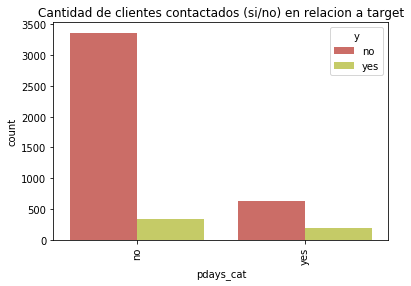

In [19]:
sns.set_palette("hls")
sns.countplot(x='pdays_cat',data = bank_data, hue='y')
plt.xticks(rotation=90)
plt.title("Cantidad de clientes contactados (si/no) en relacion a target")

Text(0.5,1,'Variable pdays_cat')

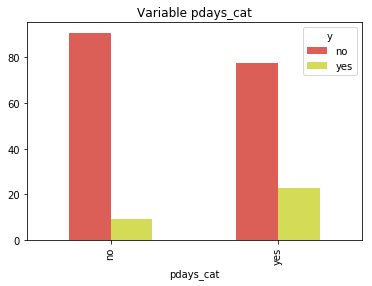

In [20]:
# Gráfico de barras % de variable pdays_cat en relacion a target
plot = pd.crosstab(index=bank_data['pdays_cat'],
            columns=bank_data['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar'),
plt.title('Variable pdays_cat')

In [21]:
#p_outcome

# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    3902
failure     490
success     129
Name: poutcome, dtype: int64

In [22]:
#day - month 
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning

bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [23]:
bank_data.shape

(4521, 15)

In [24]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,pdays_cat
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,4,failure,no,yes
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,1,failure,no,yes
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,0,unknown,no,no


### Pre-procesamiento

In [25]:
#Tipos de variables:
#Target
target_col=['y']
#Numericas
features_num=['age','balance','duration','campaign','previous']
#Categoricas binarias
cat_bin_cols=['default','housing','loan','pdays_cat']
#Categoricas multiples
features_cat=['job','marital','education','contact','poutcome']

In [26]:
# Importar LabelEncoder
from sklearn import preprocessing

#crear labelEncoder
le = preprocessing.LabelEncoder()

# Convertir variables categoricas a numericas
bank_data['default']=le.fit_transform(bank_data['default'])
bank_data['housing']=le.fit_transform(bank_data['housing'])
bank_data['loan']=le.fit_transform(bank_data['loan'])
bank_data['pdays_cat']=le.fit_transform(bank_data['pdays_cat'])

#target
bank_data['y'] = bank_data['y'].replace(['no'] , '0')
bank_data['y'] = bank_data['y'].replace(['yes'] , '1')

bank_data[cat_bin_cols+target_col].head()

,default,housing,loan,pdays_cat,y
0,0,0,0,0,0
1,0,1,1,1,0
2,0,1,0,1,0
3,0,1,1,0,0
4,0,1,0,0,0


### **Estandarizacion**

In [27]:
#Importar StandardScaler
from sklearn.preprocessing import StandardScaler

<center>  <img src="https://cdn-images-1.medium.com/max/1600/0*PXGPVYIxyI_IEHP7." width="300"> <center>  
<i>"Formula de estandarización"

In [28]:
scaler = StandardScaler()
Standarized_data=scaler.fit_transform(bank_data[features_num])
Standarized_data=pd.DataFrame(Standarized_data,columns=features_num)

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
Standarized_data.head()

,age,balance,duration,campaign,previous
0,-1.056270,0.121072,-0.711861,-0.576829,-0.320413
1,-0.772583,1.118644,-0.169194,-0.576829,2.041734
2,-0.583458,-0.024144,-0.303898,-0.576829,0.270124
3,-1.056270,0.017726,-0.250017,0.387967,-0.320413
4,1.686036,-0.472753,-0.146102,-0.576829,-0.320413


In [30]:
#colocar variables estandarizadas en data
bank_data = bank_data.drop(columns = features_num,axis = 1)
bank_data= bank_data.merge(Standarized_data,left_index=True,right_index=True,how = "left")
bank_data.head()

,job,marital,education,default,housing,loan,contact,poutcome,y,pdays_cat,age,balance,duration,campaign,previous
0,unemployed,married,primary,0,0,0,cellular,unknown,0,0,-1.056270,0.121072,-0.711861,-0.576829,-0.320413
1,services,married,secondary,0,1,1,cellular,failure,0,1,-0.772583,1.118644,-0.169194,-0.576829,2.041734
2,management,single,tertiary,0,1,0,cellular,failure,0,1,-0.583458,-0.024144,-0.303898,-0.576829,0.270124
3,management,married,tertiary,0,1,1,unknown,unknown,0,0,-1.056270,0.017726,-0.250017,0.387967,-0.320413
4,blue-collar,married,secondary,0,1,0,unknown,unknown,0,0,1.686036,-0.472753,-0.146102,-0.576829,-0.320413


In [31]:
bank_data.shape

(4521, 15)

### **Convert to Dummies (categoricas)**

In [32]:
# Convertir variables categoricas  a dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = features_cat, \
                                   prefix = features_cat)
bank_with_dummies.head()

,default,housing,loan,y,pdays_cat,age,balance,duration,campaign,previous,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,0,0,0,0,0,-1.056270,0.121072,-0.711861,-0.576829,-0.320413,...,1,0,0,0,1,0,0,0,0,1
1,0,1,1,0,1,-0.772583,1.118644,-0.169194,-0.576829,2.041734,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,-0.583458,-0.024144,-0.303898,-0.576829,0.270124,...,0,0,1,0,1,0,0,1,0,0
3,0,1,1,0,0,-1.056270,0.017726,-0.250017,0.387967,-0.320413,...,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,1.686036,-0.472753,-0.146102,-0.576829,-0.320413,...,0,1,0,0,0,0,1,0,0,1


### **Balanceo de data**


<b>NOTA IMPORTANTE</b>: <br>
Instalar imblearn con el script (en jupyter):<br>
!pip install imblearn
<p>
ó copiar en el anaconda prompt:<br>

conda install -c conda-forge imbalanced-learn

In [33]:
list(bank_with_dummies)

['default',
 'housing',
 'loan',
 'y',
 'pdays_cat',
 'age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [34]:
from imblearn.over_sampling import SMOTE
# Import train_test_split function
from sklearn.model_selection import train_test_split

cols_x=['default','housing','loan','pdays_cat','age','balance','duration','campaign',
 'previous','job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired',
 'job_self-employed','job_services','job_student','job_technician','job_unemployed',
 'job_unknown','marital_divorced','marital_married','marital_single','education_primary',
 'education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown','poutcome_failure','poutcome_success','poutcome_unknown']
smote_X=bank_with_dummies[cols_x]
smote_Y=bank_with_dummies['y']


#Split train y test de la data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .3 ,
                                                                         random_state = 42)
# 70% train and 30% test
print('Son',np.size(smote_train_X['default']),'datos en train y',np.size(smote_test_Y ),'en el test')

Son 3164 datos en train y 1357 en el test


In [35]:
#oversampling clase minoritaria usando SMOTE
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)

In [36]:
#Colocar en dataframes
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols_x)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###

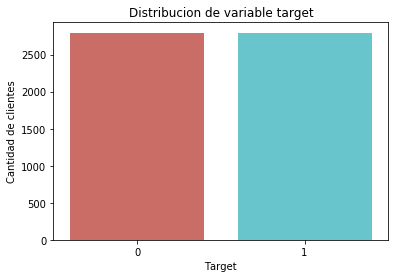

1    2795
0    2795
Name: y, dtype: int64


In [37]:
sns.countplot(x='y',data=os_smote_Y,palette='hls')
plt.title('Distribucion de variable target')
plt.xlabel('Target')
plt.ylabel('Cantidad de clientes')
plt.show()

#Target: el cliente (1 = Sí, 0 = No)
print(os_smote_Y ['y'].value_counts())

## Aplicación del modelo

In [38]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### DEFAULT (SAMME.R real boosting algorithm)

In [40]:
# inicializar el modelo (parametros en default)
# Create adaboost-decision tree classifer object
abc = AdaBoostClassifier()

#usar el modelo con la data de entrenamiento
model = abc.fit(os_smote_X,os_smote_Y)

#Usar modelo en el test
y_pred = model.predict(smote_test_X)
print("Precisión:",metrics.accuracy_score(smote_test_Y , y_pred))

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión: 0.855563743552


In [41]:
from sklearn.utils import column_or_1d
os_smote_Y = column_or_1d(os_smote_Y, warn=True)
os_smote_Y

C:\Users\KEVIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

### Tuning n_estimators

In [42]:
from sklearn.model_selection import cross_val_score
#Encontrar parametro n_estimators adecuado

estimator=np.arange(50,500,50)
acc_score=[]
for e in estimator:
    ada = AdaBoostClassifier(n_estimators=e)
    scores = cross_val_score(ada,os_smote_X,os_smote_Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.89538146441372246, 0.91113415258576558, 0.91544674859190989, 0.91688108038914484, 0.91759600614439329, 0.91902777777777767, 0.91938492063492061, 0.92028161802355357, 0.92171082949308758]


Text(0,0.5,'Cross-Validated Accuracy')

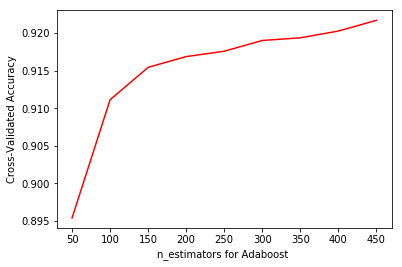

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(estimator,acc_score,color='r')
plt.xlabel('n_estimators for Adaboost ')
plt.ylabel('Cross-Validated Accuracy')

### Gridsearch

In [44]:
from sklearn.model_selection import GridSearchCV

ada=AdaBoostClassifier()
#np.arange(0.1,1,0.1)
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

search=GridSearchCV(estimator=ada,param_grid=search_grid,
                   scoring='accuracy',cv=10)

search.fit(os_smote_X,os_smote_Y)

0.915384615385


In [62]:
print(search.best_score_)

0.915384615385


In [47]:
grid_df=pd.DataFrame(search.cv_results_)
grid_df

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,4.411259,0.099596,0.068860,0.003238,0.001,500,"{'learning_rate': 0.001, 'n_estimators': 500}",0.755357,0.701786,0.771429,...,0.740358,0.741948,0.745527,0.743442,0.745231,0.746025,0.740859,0.745231,0.743709,0.001912
1,8.816322,0.084004,0.135322,0.002202,0.001,1000,"{'learning_rate': 0.001, 'n_estimators': 1000}",0.771429,0.733929,0.783929,...,0.762823,0.759046,0.763618,0.757750,0.760930,0.756558,0.758347,0.758347,0.760366,0.002685
2,18.230188,0.929854,0.272142,0.006730,0.001,2000,"{'learning_rate': 0.001, 'n_estimators': 2000}",0.796429,0.773214,0.808929,...,0.790060,0.788867,0.789662,0.792925,0.788553,0.785175,0.786367,0.790143,0.789585,0.002482
3,4.499103,0.047238,0.069563,0.001353,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.794643,0.800000,0.819643,...,0.821272,0.819085,0.820080,0.819157,0.819952,0.819754,0.817170,0.822734,0.820255,0.001659
4,9.055484,0.100970,0.138022,0.001514,0.01,1000,"{'learning_rate': 0.01, 'n_estimators': 1000}",0.794643,0.823214,0.846429,...,0.847714,0.846322,0.844334,0.847178,0.846582,0.843998,0.845191,0.846383,0.847903,0.005380
5,17.616350,0.168189,0.274837,0.016325,0.01,2000,"{'learning_rate': 0.01, 'n_estimators': 2000}",0.798214,0.844643,0.882143,...,0.870179,0.869583,0.868390,0.870429,0.869237,0.868045,0.866852,0.871025,0.871060,0.005281
6,4.407463,0.083302,0.067961,0.001095,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.757143,0.855357,0.910714,...,0.900199,0.895825,0.897416,0.898450,0.898052,0.896463,0.897854,0.898251,0.900478,0.006359
7,8.970133,0.138443,0.137922,0.002324,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.723214,0.871429,0.941071,...,0.913320,0.915308,0.914513,0.914348,0.915541,0.913951,0.911765,0.913951,0.917552,0.008246
8,18.112056,0.217821,0.275646,0.003184,0.1,2000,"{'learning_rate': 0.1, 'n_estimators': 2000}",0.698214,0.880357,0.950000,...,0.925447,0.926243,0.926441,0.929054,0.927266,0.926272,0.925874,0.927464,0.930432,0.008642


In [57]:
lista=[]
for x in range(0,grid_df['mean_train_score'].shape[0]):
    lista.append(grid_df['mean_train_score'][x])
lista

[0.74370891503127501,
 0.76036612597862752,
 0.78958476486075591,
 0.82025452215166861,
 0.84790340627143357,
 0.87105981756519701,
 0.90047757177127996,
 0.91755190636783435,
 0.9304319709722586]

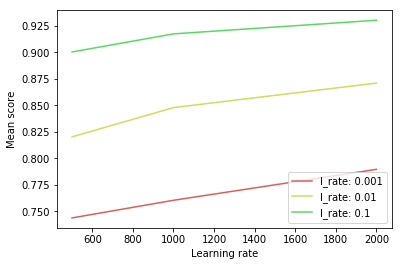

In [60]:
#plot de gridsearch
est=[500,1000,2000]
lrn_rt=[.001,0.01,.1]

scores = [lista]
scores = np.array(scores).reshape(len(lrn_rt), len(est))

for ind, i in enumerate(lrn_rt):
    plt.plot(est, scores[ind], label='l_rate: ' + str(i))
plt.legend()
plt.xlabel('Learning rate')
plt.ylabel('Mean score')
plt.show()

In [61]:
#Mejores hiperparametros:
print('Mejores hiperparametros: ',search.best_params_)

Mejores hiperparametros:  {'learning_rate': 0.1, 'n_estimators': 2000}


In [71]:
#PREDECIR
y_pred_search= search.predict(smote_test_X)
print(metrics.accuracy_score(smote_test_Y,y_pred_search))

0.877671333825



<img src="https://educationalresearchtechniques.files.wordpress.com/2016/08/13.png?w=415" width="300">
<center> <i>Imagen referencial matriz de confusión

Text(0.5,15,'Predicted label')

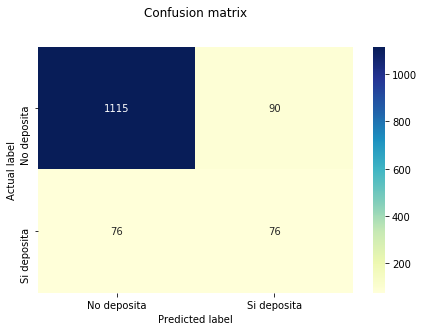

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(smote_test_Y, y_pred_search)

class_names=['No deposita','Si deposita'] # clases
# create mapa de calor
sns.heatmap(confusion_matrix,xticklabels=class_names,yticklabels=class_names, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Usando SVM  con Adaboost

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC

svc=SVC(probability=True)

# Create adaboost classifer object
abc_svc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

#usar el modelo con la data de entrenamiento
model_svc = abc_svc.fit(os_smote_X,os_smote_Y)

#Usar modelo en el test
y_pred_svc = model_svc.predict(smote_test_X)
print("Precisión:",metrics.accuracy_score(smote_test_Y , y_pred_svc))


C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\KEVIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni